In [7]:
!pip3 install openpyxl


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\theky\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
# Load the Excel file into a DataFrame
df = pd.read_csv(r'./Data/CanadaPost_WorkLoad.csv')


In [2]:
# Display the first few rows of the DataFrame
print(df.head())


       Date  Workload sum   Scheduled Hours (Sum)    Planned Absences(Sum)   \
0  1/1/2019           8.0                     0.00                     0.00   
1  1/2/2019       40804.0                  8885.90                  1195.23   
2  1/3/2019       42189.0                  9656.08                  1218.42   
3  1/4/2019       44384.0                  8795.96                  1269.42   
4  1/5/2019          11.0                  4354.98                   575.00   

    Unplanned Absences (Sum)    Unpaid Absences (Sum)   Max Temp (�C)  \
0                        0.00                     0.00            5.3   
1                      647.96                   296.59            5.5   
2                      562.20                   283.91            9.5   
3                      578.67                   277.13           10.4   
4                      305.32                   132.69            8.7   

   Max Temp Flag  Min Temp (�C)  Min Temp Flag  ...  Total Snow (cm)  \
0            0

In [3]:
# Get information about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1870 non-null   object 
 1   Workload sum                1870 non-null   float64
 2    Scheduled Hours (Sum)      1870 non-null   float64
 3    Planned Absences(Sum)      1870 non-null   float64
 4    Unplanned Absences (Sum)   1870 non-null   float64
 5    Unpaid Absences (Sum)      1870 non-null   float64
 6   Max Temp (�C)               1870 non-null   float64
 7   Max Temp Flag               1870 non-null   float64
 8   Min Temp (�C)               1870 non-null   float64
 9   Min Temp Flag               1870 non-null   float64
 10  Mean Temp (�C)              1870 non-null   float64
 11  Mean Temp Flag              1870 non-null   float64
 12  Heat Deg Days (�C)          1870 non-null   float64
 13  Heat Deg Days Flag          1870 

In [4]:
# Summary statistics for numerical columns
print(df.describe())


        Workload sum   Scheduled Hours (Sum)    Planned Absences(Sum)   \
count    1870.000000              1870.000000              1870.000000   
mean    19014.514439              7182.622225               890.299733   
std     23736.842212              2743.675036               473.144171   
min         0.000000                 0.000000                 0.000000   
25%         0.000000              5199.755000               548.115000   
50%        10.500000              8278.350000               876.800000   
75%     38853.500000              9272.440000              1214.112500   
max    102848.000000             19342.740000              3203.740000   

        Unplanned Absences (Sum)    Unpaid Absences (Sum)   Max Temp (�C)  \
count                 1870.000000              1870.000000    1870.000000   
mean                   799.127021               235.116519       8.341925   
std                    503.305719               133.721086       8.632226   
min                      

In [5]:
# Check dimensions of the dataset
print("Dimensions of the dataset:", df.shape)


Dimensions of the dataset: (1995, 28)


Summary statistics for numerical columns:
        Workload sum   Scheduled Hours (Sum)    Planned Absences(Sum)   \
count    1870.000000              1870.000000              1870.000000   
mean    19014.514439              7182.622225               890.299733   
std     23736.842212              2743.675036               473.144171   
min         0.000000                 0.000000                 0.000000   
25%         0.000000              5199.755000               548.115000   
50%        10.500000              8278.350000               876.800000   
75%     38853.500000              9272.440000              1214.112500   
max    102848.000000             19342.740000              3203.740000   

        Unplanned Absences (Sum)    Unpaid Absences (Sum)   Max Temp (�C)  \
count                 1870.000000              1870.000000    1870.000000   
mean                   799.127021               235.116519       8.341925   
std                    503.305719               133.721086  

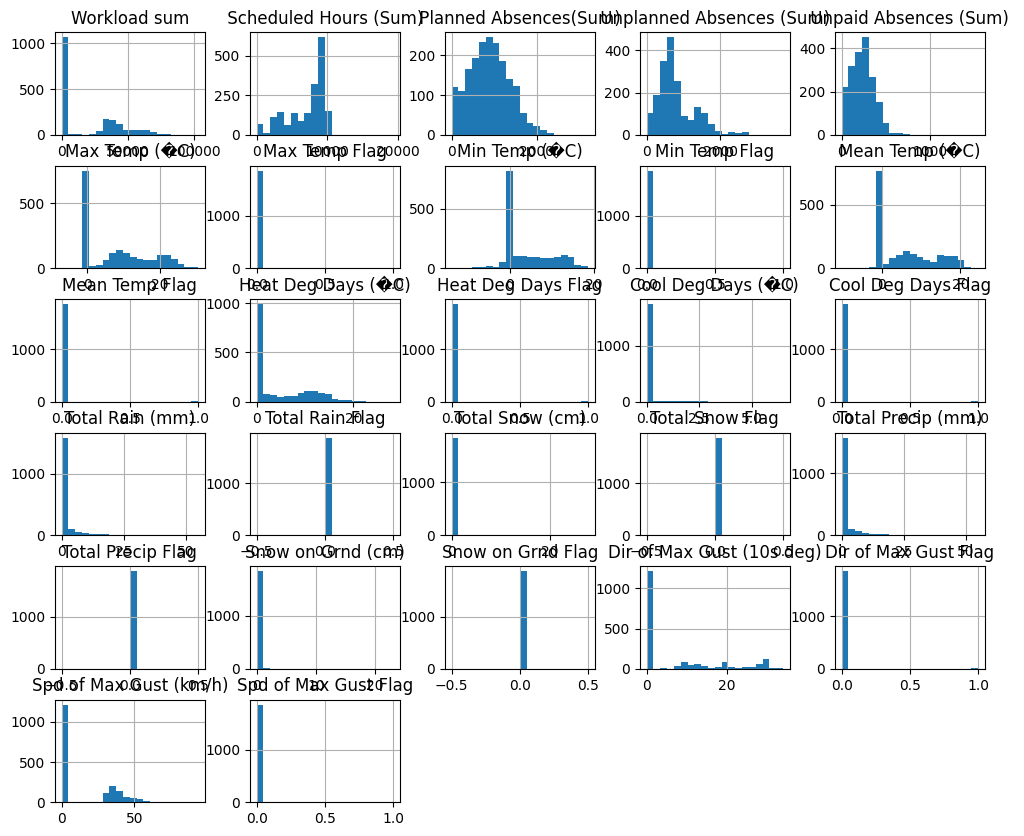

In [6]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df.describe())

# Analyze the distribution of numerical variables
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=20, figsize=(12, 10))
plt.show()


In [9]:
# Check the unique values in the 'CALENDAR_DATE' column
print("Unique values in the 'CALENDAR_DATE' column:")
print(df['CALENDAR_DATE'].unique())


Unique values in the 'CALENDAR_DATE' column:
[datetime.datetime(2022, 10, 4, 0, 0) datetime.datetime(2023, 2, 8, 0, 0)
 datetime.datetime(2022, 9, 14, 0, 0) ...
 datetime.datetime(2024, 2, 3, 0, 0) nan 'Result Status:']


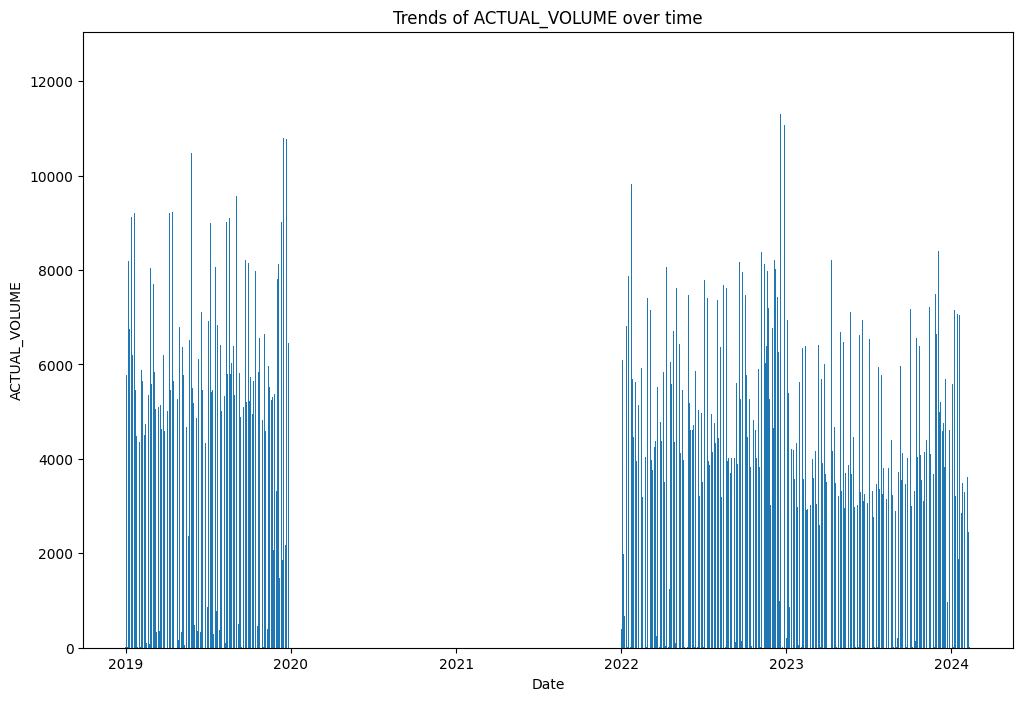

In [11]:
# Remove rows with unexpected values in 'CALENDAR_DATE' column
df = df[df['CALENDAR_DATE'] != 'Result Status:']

# Now, try converting 'CALENDAR_DATE' to datetime format again
df['CALENDAR_DATE'] = pd.to_datetime(df['CALENDAR_DATE'])

# Analyze trends over time
plt.figure(figsize=(12, 8))
plt.bar(df['CALENDAR_DATE'], df['ACTUAL_VOLUME'])
plt.title('Trends of ACTUAL_VOLUME over time')
plt.xlabel('Date')
plt.ylabel('ACTUAL_VOLUME')
plt.show()


In [13]:
df=df.drop('SITE_PROVINCE_CODE', axis=1)
df=df.drop('PLANT_NAME_EN', axis=1)
df=df.drop('PCR_CC_CITY', axis=1)
df=df.drop('PCR_CC_POSTAL_CODE', axis=1)
df=df.drop('PCR_CC_ROLLUP', axis=1)

KeyError: "['SITE_PROVINCE_CODE'] not found in axis"

In [14]:
df.head()

,CALENDAR_DATE,NATIONAL_HOLIDAY_IND,PROVINCIAL_HOLIDAY_IND,IMPACT_DAY_FLG,DAY_OF_WEEK,WEEK_OF_YEAR,DAY_OF_MONTH,MONTH_NO,YEAR_NO,COST_CENTRE_ID,PEAK,ACTUAL_VOLUME
0,2022-10-04,0,0.0,0.0,3.0,40.0,4.0,10.0,2022.0,51217.0,0.0,648.0
1,2023-02-08,0,0.0,0.0,4.0,6.0,8.0,2.0,2023.0,51217.0,0.0,858.0
2,2022-09-14,0,0.0,0.0,4.0,37.0,14.0,9.0,2022.0,51217.0,0.0,690.0
3,2019-11-20,0,0.0,0.0,4.0,46.0,20.0,11.0,2019.0,51217.0,1.0,747.0
4,2024-01-18,0,0.0,0.0,5.0,2.0,18.0,1.0,2024.0,51217.0,1.0,609.0


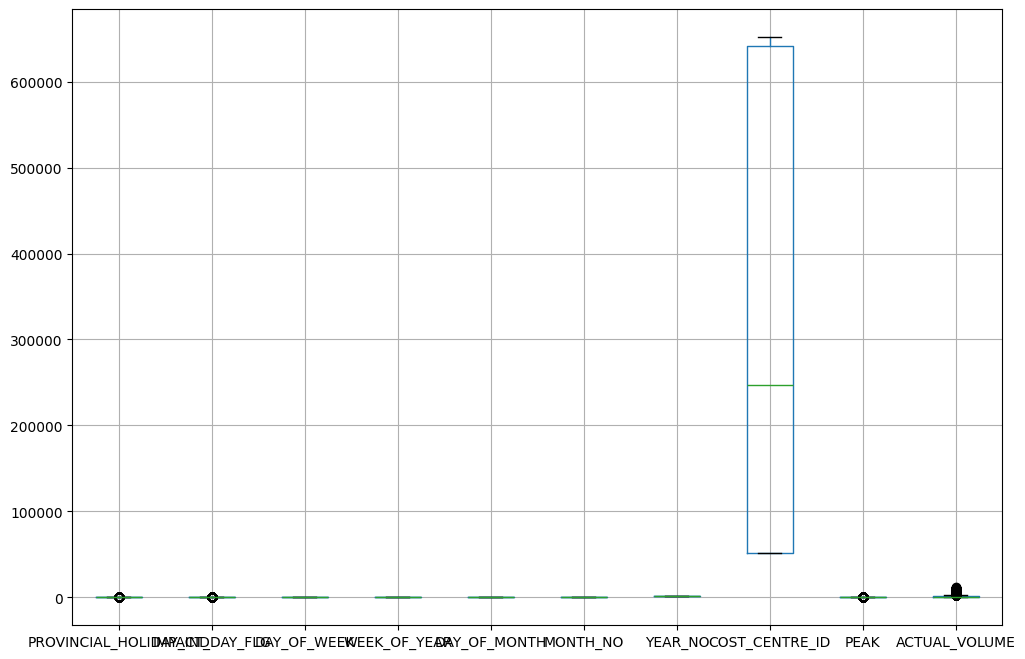

In [15]:
#Box plots for numerical variables
df[numerical_cols].boxplot(figsize=(12, 8))
plt.show()


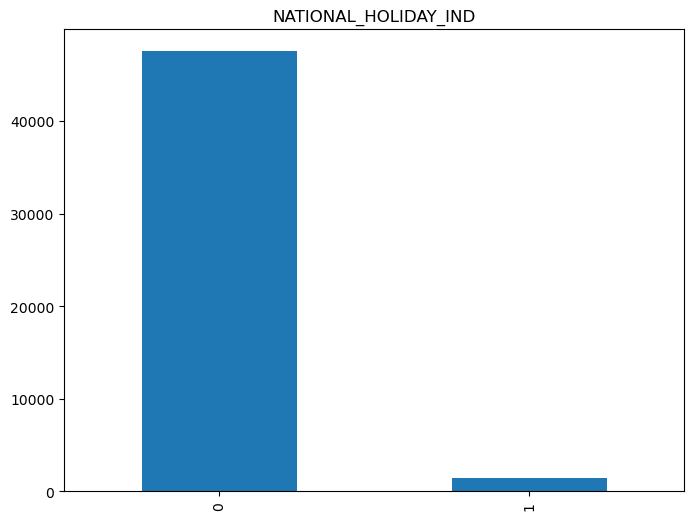

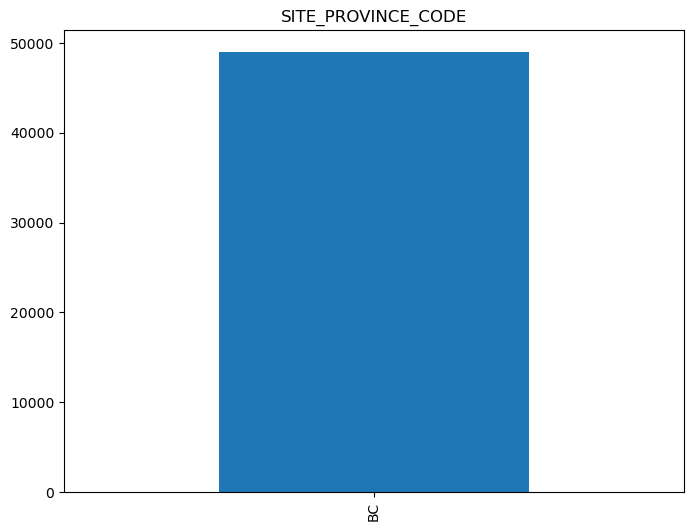

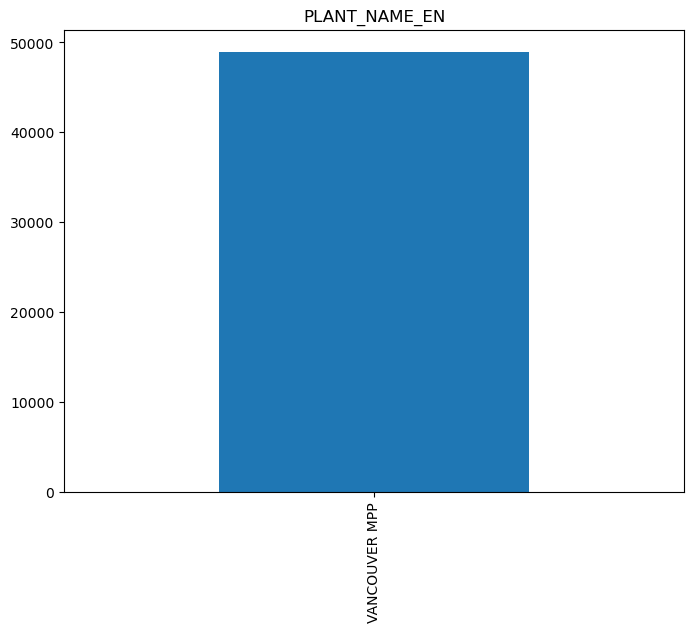

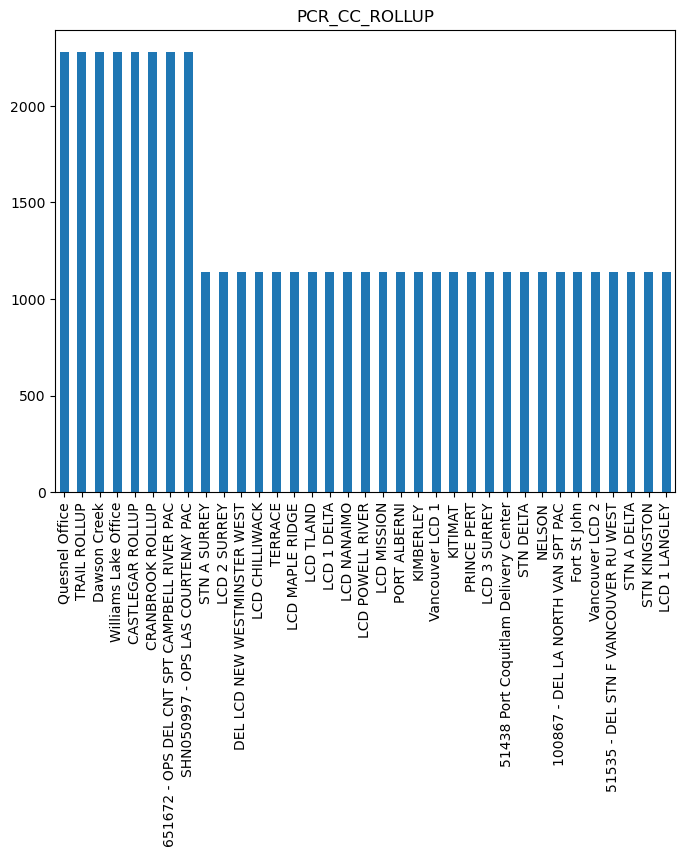

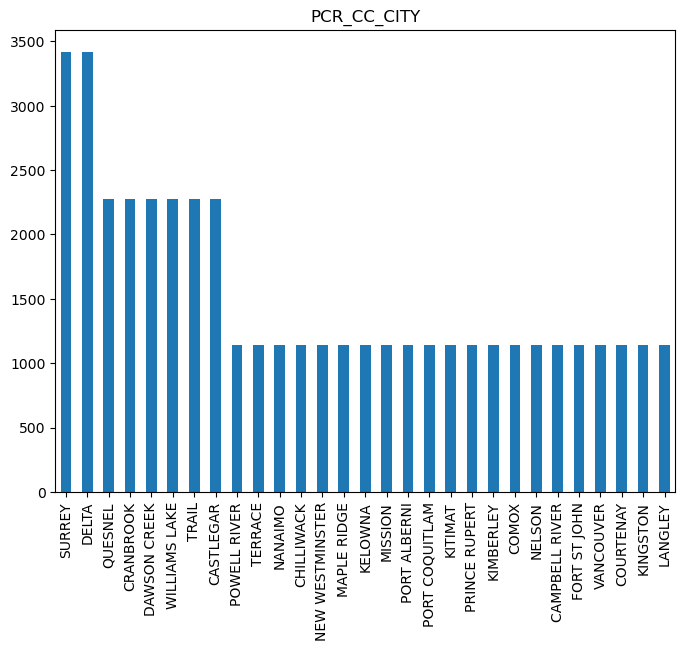

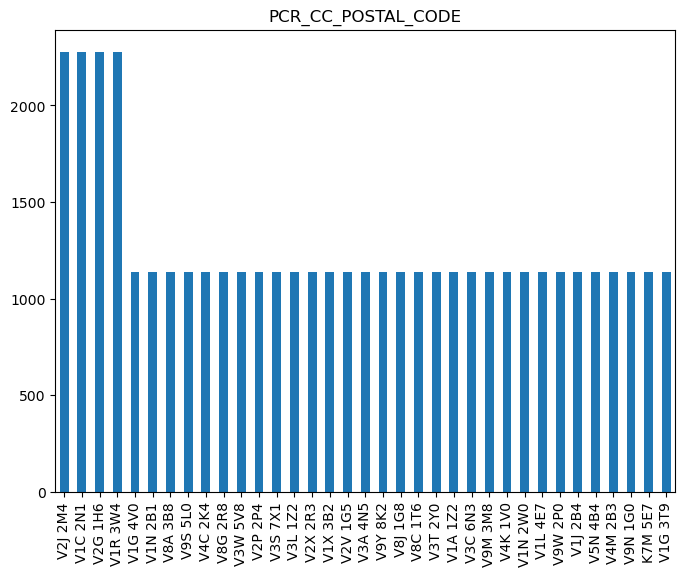

In [21]:
# Bar plots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', figsize=(8, 6), title=col)
    plt.show()


In [16]:
correlation_matrix = df.corr()
print(correlation_matrix)


                        CALENDAR_DATE  NATIONAL_HOLIDAY_IND  \
CALENDAR_DATE            1.000000e+00          1.537694e-02   
NATIONAL_HOLIDAY_IND     1.537694e-02          1.000000e+00   
PROVINCIAL_HOLIDAY_IND   1.549222e-04         -9.014254e-03   
IMPACT_DAY_FLG          -1.532590e-02          2.371307e-02   
DAY_OF_WEEK             -8.975459e-04         -9.251650e-02   
WEEK_OF_YEAR             1.016397e-01          5.482436e-02   
DAY_OF_MONTH             2.431865e-03         -4.590513e-02   
MONTH_NO                 8.463347e-02          5.699655e-02   
YEAR_NO                  9.856567e-01          6.402315e-03   
COST_CENTRE_ID          -3.756140e-15          2.872251e-16   
PEAK                     8.432089e-02          6.192484e-02   
ACTUAL_VOLUME           -3.336918e-02         -9.552334e-02   

                        PROVINCIAL_HOLIDAY_IND  IMPACT_DAY_FLG   DAY_OF_WEEK  \
CALENDAR_DATE                     1.549222e-04   -1.532590e-02 -8.975459e-04   
NATIONAL_HOLIDAY_IND

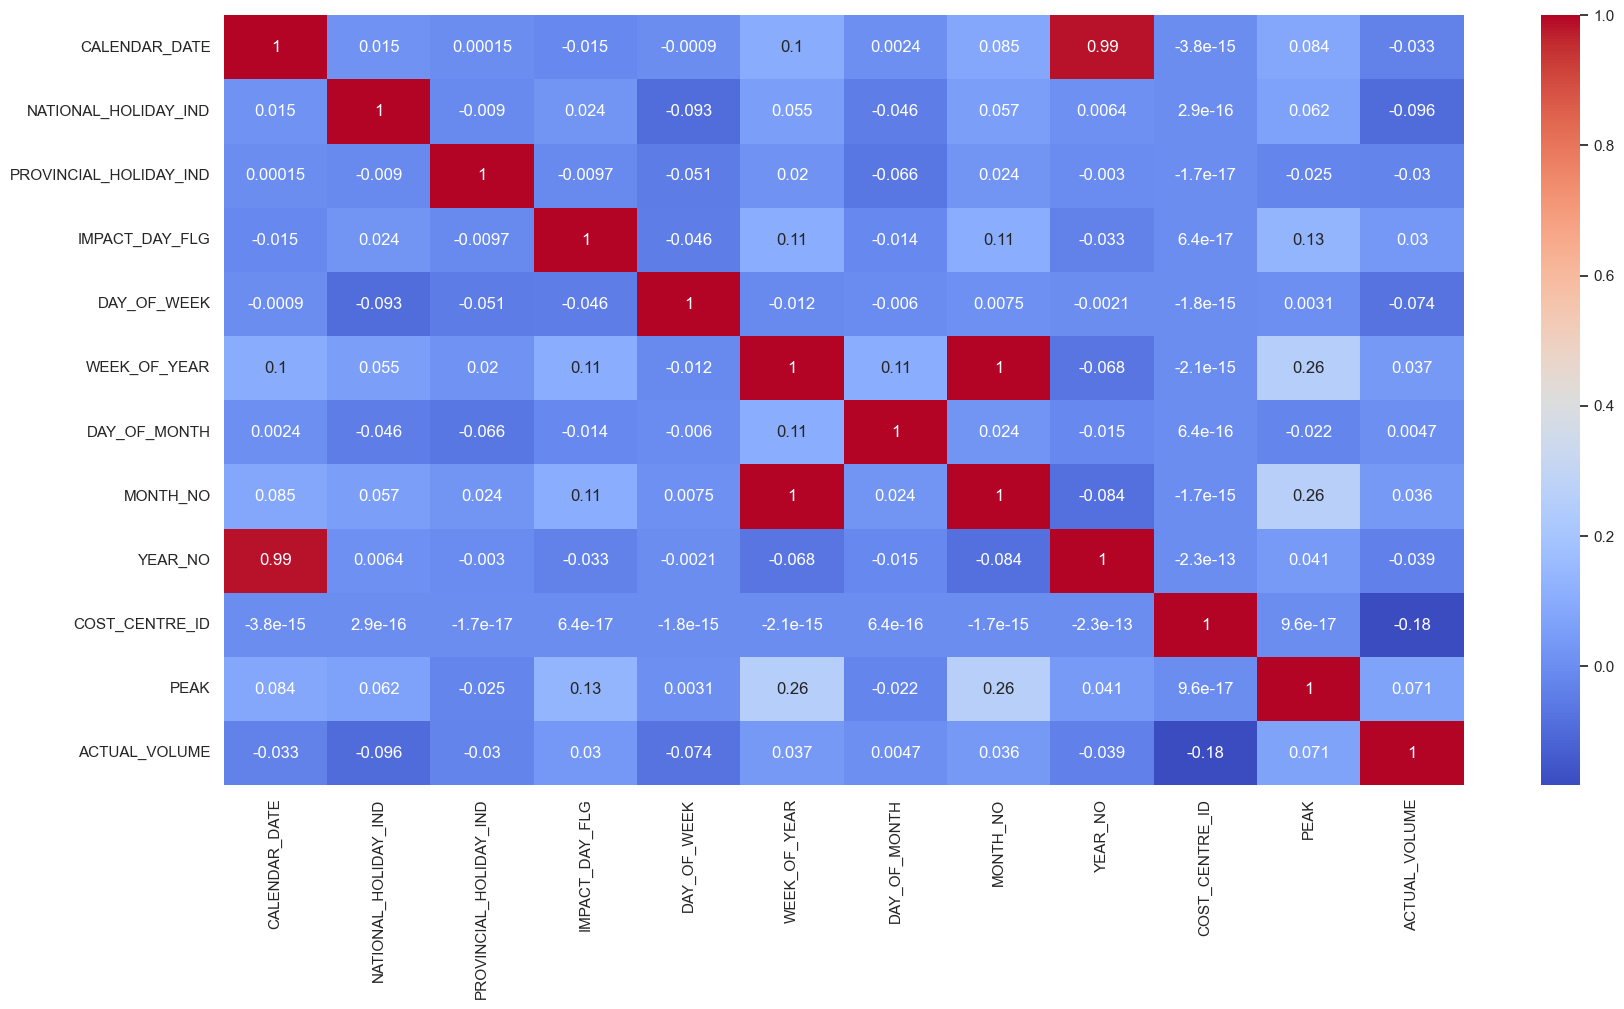

In [28]:
import seaborn as sns

sns.set_theme(font_scale=0.7)
sns.set_theme(rc={'figure.figsize': (20,10)})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.figure(figsize=(30, 10))
plt.show()


In [29]:
# Examine the frequency and distribution of holiday indicators
holiday_freq = df['NATIONAL_HOLIDAY_IND'].value_counts()
print("Frequency of National Holiday Indicators:")
print(holiday_freq)

holiday_dist = df.groupby('NATIONAL_HOLIDAY_IND').size() / len(df)
print("\nDistribution of National Holiday Indicators:")
print(holiday_dist)

Frequency of National Holiday Indicators:
NATIONAL_HOLIDAY_IND
0    47515
1     1462
Name: count, dtype: int64

Distribution of National Holiday Indicators:
NATIONAL_HOLIDAY_IND
0    0.970129
1    0.029850
dtype: float64


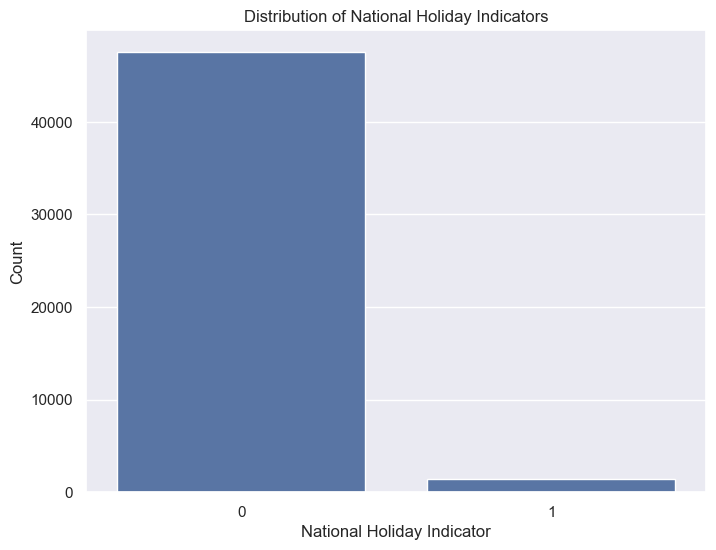

In [30]:
# Visualize the distribution of holiday indicators
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NATIONAL_HOLIDAY_IND')
plt.title('Distribution of National Holiday Indicators')
plt.xlabel('National Holiday Indicator')
plt.ylabel('Count')
plt.show()

In [31]:
# Check for null values in all columns
print("Null values in each column:")
print(df.isnull().sum())


Null values in each column:
CALENDAR_DATE             1
NATIONAL_HOLIDAY_IND      1
PROVINCIAL_HOLIDAY_IND    1
IMPACT_DAY_FLG            1
DAY_OF_WEEK               1
WEEK_OF_YEAR              1
DAY_OF_MONTH              1
MONTH_NO                  1
YEAR_NO                   1
COST_CENTRE_ID            1
PEAK                      1
ACTUAL_VOLUME             1
dtype: int64


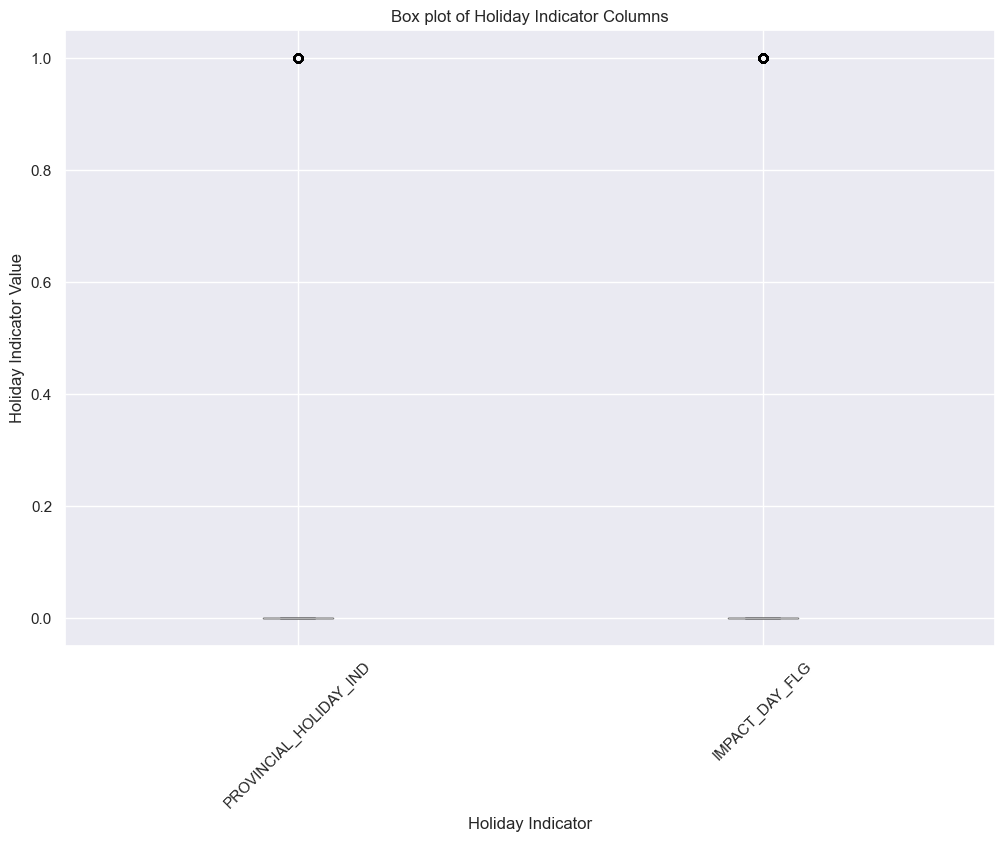

In [32]:
# Select holiday indicator columns
holiday_indicator_cols = ['NATIONAL_HOLIDAY_IND', 'PROVINCIAL_HOLIDAY_IND', 'IMPACT_DAY_FLG']

# Create box plots for holiday indicator columns
plt.figure(figsize=(12, 8))
df[holiday_indicator_cols].boxplot()
plt.title('Box plot of Holiday Indicator Columns')
plt.ylabel('Holiday Indicator Value')
plt.xlabel('Holiday Indicator')
plt.xticks(rotation=45)
plt.show()


NameError: name 'df' is not defined

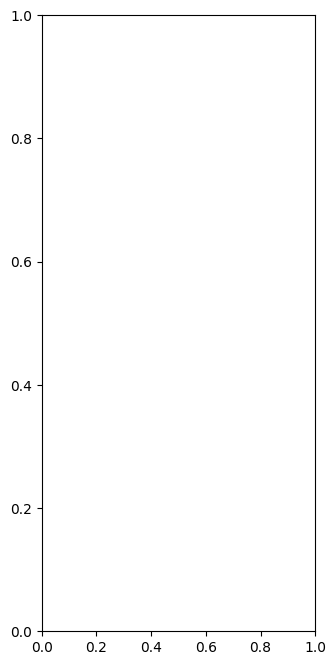

In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Plotting against each holiday indicator
plt.figure(figsize=(12, 8))

# Scatter plot for NATIONAL_HOLIDAY_IND vs. ACTUAL_VOLUME
plt.subplot(1, 3, 1)
plt.scatter(df['NATIONAL_HOLIDAY_IND'], df['ACTUAL_VOLUME'])
plt.title('NATIONAL_HOLIDAY_IND vs. ACTUAL_VOLUME')
plt.xlabel('NATIONAL_HOLIDAY_IND')
plt.ylabel('ACTUAL_VOLUME')

# Scatter plot for PROVINCIAL_HOLIDAY_IND vs. ACTUAL_VOLUME
plt.subplot(1, 3, 2)
plt.scatter(df['PROVINCIAL_HOLIDAY_IND'], df['ACTUAL_VOLUME'])
plt.title('PROVINCIAL_HOLIDAY_IND vs. ACTUAL_VOLUME')
plt.xlabel('PROVINCIAL_HOLIDAY_IND')
plt.ylabel('ACTUAL_VOLUME')

# Scatter plot for IMPACT_DAY_FLG vs. ACTUAL_VOLUME
plt.subplot(1, 3, 3)
plt.scatter(df['IMPACT_DAY_FLG'], df['ACTUAL_VOLUME'])
plt.title('IMPACT_DAY_FLG vs. ACTUAL_VOLUME')
plt.xlabel('IMPACT_DAY_FLG')
plt.ylabel('ACTUAL_VOLUME')

plt.tight_layout()
plt.show()
